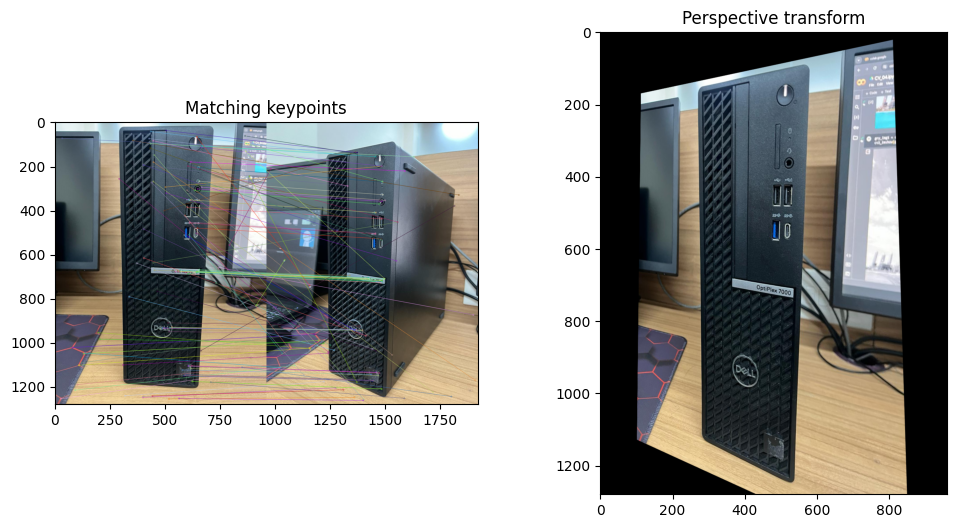

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load images
img1 = cv2.imread('img-1.jpg')
img2 = cv2.imread('img-2.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_1, descriptors_1 = sift.detectAndCompute(gray1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(gray2, None)

# Create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.knnMatch(descriptors_1, descriptors_2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Extract keypoints
src_pts = np.float32([keypoints_1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Apply perspective transform
h, w = gray1.shape
transformed_img = cv2.warpPerspective(img1, M, (w, h))

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('Matching keypoints')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))
plt.title('Perspective transform')
plt.show()